In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import matplotlib.patches as mpatches

In [9]:
official_data_path="./official_data/"
image_path='./images/'

In [3]:
#airtemps = xr.tutorial.open_dataset("air_temperature")
iod_r=xr.open_dataset(official_data_path+'iod.nc')
vwind_r=xr.open_dataset(official_data_path+'vwnd.10m.anom.mon.mean.nc')
uwind_r=xr.open_dataset(official_data_path+'uwnd.10m.anom.mon.mean.nc')
precip_r=xr.open_dataset(official_data_path+'precip.anom.mon.mean.nc')
sst_r=xr.open_dataset(official_data_path+'sst.anom.mon.mean.nc')

d:\anaconda3\envs\final_sealab\lib\site-packages\xarray\coding\times.py:154: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


In [4]:
wind = xr.merge([uwind_r, vwind_r])

In [5]:
iod=iod_r.iod
iod_values = iod.values.flatten()

positive_event_dates = []
negative_event_dates = []

consecutive_months_positive = 0
consecutive_months_negative = 0

for i in range(len(iod)):
    if iod_values[i] >= 0.4:
        consecutive_months_positive += 1
        if consecutive_months_positive >= 3:
            t = np.datetime_as_string(iod.time.values[i], unit='D')
            positive_event_dates.append(t)
    else:
        consecutive_months_positive = 0

    if iod_values[i] <= -0.4:
        consecutive_months_negative += 1
        if consecutive_months_negative >= 3:
            t = np.datetime_as_string(iod.time.values[i], unit='D')
            negative_event_dates.append(t)
    else:
        consecutive_months_negative = 0

print("Positive Event Dates (IOD >= 0.4):\n", positive_event_dates, '\n')
print("Negative Event Dates (IOD <= -0.4):\n", negative_event_dates)


positive_event_dates = []  
negative_event_dates = []
positive_consecutive = []
negative_consecutive = []

consecutive_months_positive = 0
consecutive_months_negative = 0

iod_values = iod.values.flatten()

for i in range(len(iod)):
    if iod_values[i] >= 0.4:
        consecutive_months_positive += 1
        if consecutive_months_positive >= 3:
            t = np.datetime_as_string(iod.time.values[i], unit='D')
            positive_event_dates.append(t)
            positive_consecutive.append(consecutive_months_positive)
            pos_df = pd.DataFrame({'pos_event':positive_event_dates , 'consecutive':positive_consecutive})
    else:
        consecutive_months_positive = 0

    if iod_values[i] <= -0.4:
        consecutive_months_negative += 1
        if consecutive_months_negative >= 3:
            t = np.datetime_as_string(iod.time.values[i], unit='D')
            negative_event_dates.append(t)
            negative_consecutive.append(consecutive_months_negative)
            neg_df = pd.DataFrame({'neg_event':negative_event_dates , 'consecutive':negative_consecutive})
    else:
        consecutive_months_negative = 0
        
pos_3 = pos_df[pos_df['consecutive']==3]['pos_event'].tolist()

Positive Event Dates (IOD >= 0.4):
 ['1982-04-01', '1982-05-01', '1982-06-01', '1982-07-01', '1982-08-01', '1982-09-01', '1982-10-01', '1982-11-01', '1983-08-01', '1994-06-01', '1994-07-01', '1994-08-01', '1994-09-01', '1994-10-01', '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01', '1998-01-01', '2002-11-01', '2003-08-01', '2006-11-01', '2006-12-01', '2007-08-01', '2008-08-01', '2011-10-01', '2012-09-01', '2015-10-01', '2015-11-01', '2017-06-01', '2017-07-01', '2017-08-01', '2018-11-01', '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01'] 

Negative Event Dates (IOD <= -0.4):
 ['1983-04-01', '1989-10-01', '1989-11-01', '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01', '1992-09-01', '1992-10-01', '1996-09-01', '1996-10-01', '1996-11-01', '1998-09-01', '1998-10-01', '1998-11-01', '2005-09-01', '2005-10-01', '2010-11-01', '2016-08-01', '2016-09-01', '2016-10-01', '2022-09-01', '2022-10-01']


In [6]:
len(negative_event_dates)

23

In [7]:
# netural date 구분
all_event_dates = positive_event_dates + negative_event_dates

# 전체 날짜에서 이벤트 날짜를 제외한 날짜 리스트 생성
total_time = np.datetime_as_string(iod.time.values, unit='D')
non_event_dates = [date for date in total_time if date not in all_event_dates]


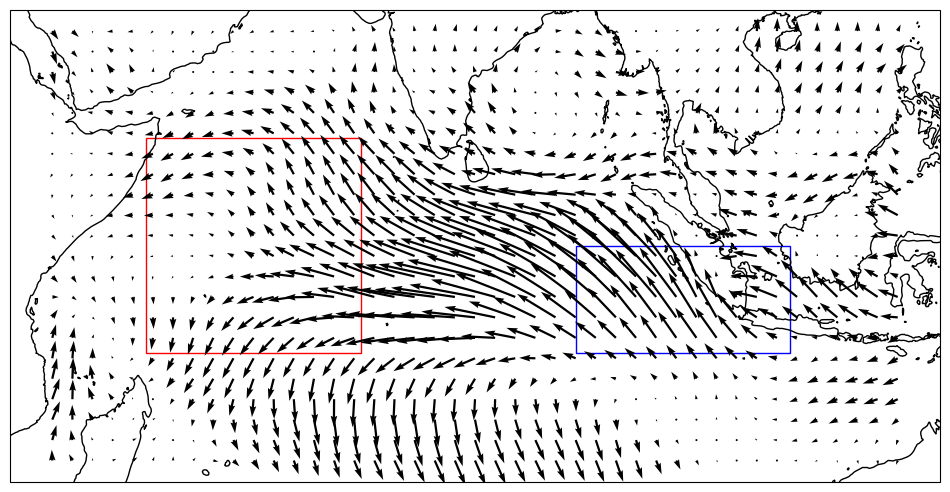

In [10]:
# positive envetn_wind_india cut

wind_positive_event = wind.sel(time=positive_event_dates).mean(dim='time')
final_cut = wind_positive_event.sel(lat=slice(-20, 20), lon=slice(40, 120))


u = final_cut.variables['uwnd'][:]
v = final_cut.variables['vwnd'][:]
lon = final_cut.variables['lon'][:]
lat = final_cut.variables['lat'][:]

lon2D, lat2D = np.meshgrid(lon, lat)

fig = plt.figure(figsize=(12, 9.5))


ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()

#범위지정
lon1, lon2, lat1, lat2 = 50, 70, 10, -10
vertices = [(lon1, lat1), (lon2, lat1), (lon2, lat2), (lon1, lat2)]

polygon2 = mpatches.Polygon(vertices, closed=True, edgecolor='r', facecolor='none', transform=ccrs.PlateCarree())
ax.add_patch(polygon2)

lon1, lon2, lat1, lat2 = 90, 110, -10, 0
vertices = [(lon1, lat1), (lon2, lat1), (lon2, lat2), (lon1, lat2)]

polygon = mpatches.Polygon(vertices, closed=True, edgecolor='b', facecolor='none', transform=ccrs.PlateCarree())
ax.add_patch(polygon)



# Plot wind vectors
ax.quiver(lon2D, lat2D, u[0, :, :], v[0, :, :], transform=ccrs.PlateCarree())
plt.savefig(image_path+'graph/positve_wind.png', bbox_inches='tight', pad_inches=0.1)

plt.show()

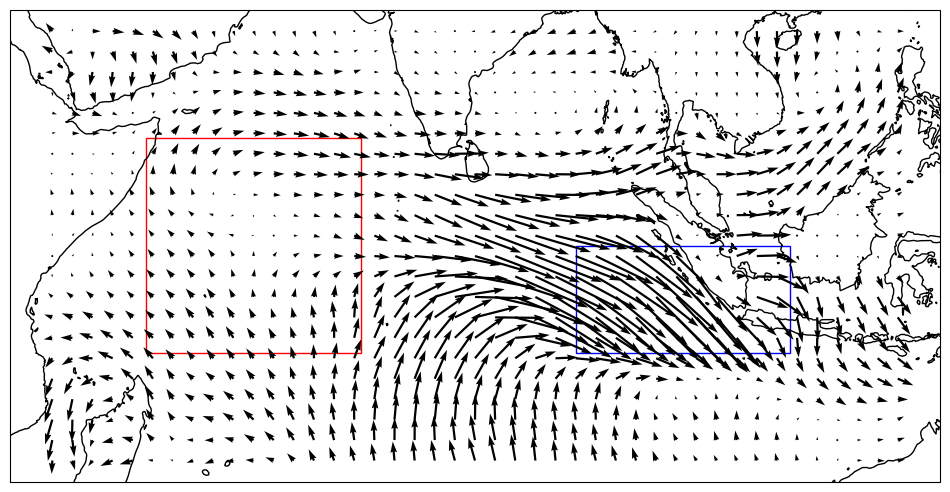

In [11]:
# negative envetn_wind_india cut

wind_negative_event = wind.sel(time=negative_event_dates).mean(dim='time')
final_cut = wind_negative_event.sel(lat=slice(-20, 20), lon=slice(40, 120))


u = final_cut.variables['uwnd'][:]
v = final_cut.variables['vwnd'][:]
lon = final_cut.variables['lon'][:]
lat = final_cut.variables['lat'][:]

lon2D, lat2D = np.meshgrid(lon, lat)

fig = plt.figure(figsize=(12, 9.5))


ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()

#범위지정
lon1, lon2, lat1, lat2 = 50, 70, 10, -10
vertices = [(lon1, lat1), (lon2, lat1), (lon2, lat2), (lon1, lat2)]

polygon2 = mpatches.Polygon(vertices, closed=True, edgecolor='r', facecolor='none', transform=ccrs.PlateCarree())
ax.add_patch(polygon2)

lon1, lon2, lat1, lat2 = 90, 110, -10, 0
vertices = [(lon1, lat1), (lon2, lat1), (lon2, lat2), (lon1, lat2)]

polygon = mpatches.Polygon(vertices, closed=True, edgecolor='b', facecolor='none', transform=ccrs.PlateCarree())
ax.add_patch(polygon)



# Plot wind vectors
ax.quiver(lon2D, lat2D, u[0, :, :], v[0, :, :], transform=ccrs.PlateCarree())
plt.savefig(image_path+'graph/negative_wind.png', bbox_inches='tight', pad_inches=0.1)

plt.show()

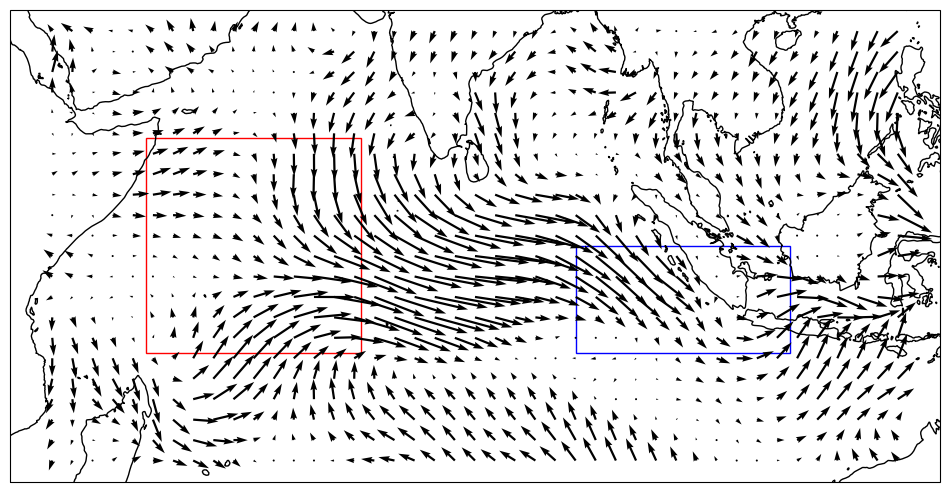

In [12]:
# netural envetn_wind_india cut

wind_netural_event = wind.sel(time=non_event_dates).mean(dim='time')
final_cut = wind_netural_event.sel(lat=slice(-20, 20), lon=slice(40, 120))


u = final_cut.variables['uwnd'][:]
v = final_cut.variables['vwnd'][:]
lon = final_cut.variables['lon'][:]
lat = final_cut.variables['lat'][:]

lon2D, lat2D = np.meshgrid(lon, lat)

fig = plt.figure(figsize=(12, 9.5))


ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()

#범위지정
lon1, lon2, lat1, lat2 = 50, 70, 10, -10
vertices = [(lon1, lat1), (lon2, lat1), (lon2, lat2), (lon1, lat2)]

polygon2 = mpatches.Polygon(vertices, closed=True, edgecolor='r', facecolor='none', transform=ccrs.PlateCarree())
ax.add_patch(polygon2)

lon1, lon2, lat1, lat2 = 90, 110, -10, 0
vertices = [(lon1, lat1), (lon2, lat1), (lon2, lat2), (lon1, lat2)]

polygon = mpatches.Polygon(vertices, closed=True, edgecolor='b', facecolor='none', transform=ccrs.PlateCarree())
ax.add_patch(polygon)



# Plot wind vectors
ax.quiver(lon2D, lat2D, u[0, :, :], v[0, :, :], transform=ccrs.PlateCarree())
plt.savefig(image_path+'graph/netural_wind.png', bbox_inches='tight', pad_inches=0.1)

plt.show()

>sst

In [13]:
# Normalize 객체 생성
# normalize = Normalize(vmin=min(df1['precip'].min(), df2['precip'].min(), df3['precip'].min()),
                    #   vmax=max(df1['precip'].max(), df2['precip'].max(), df3['precip'].max()))

# qq1 = m1.pcolor(lon1, lat1, df1_pivot, cmap=cmap, norm=normalize)


# colorbar 통일

# positive_cut = sst_positive_event.sel(lat=slice(-20, 20), lon=slice(40, 120))
sst_positive_event = sst_r.sel(time=positive_event_dates).mean(dim='time')


sst_np=sst_positive_event.sst.data
scommon_vmin = np.nanmin(sst_np) 
scommon_vmax = np.nanmax(sst_np) 



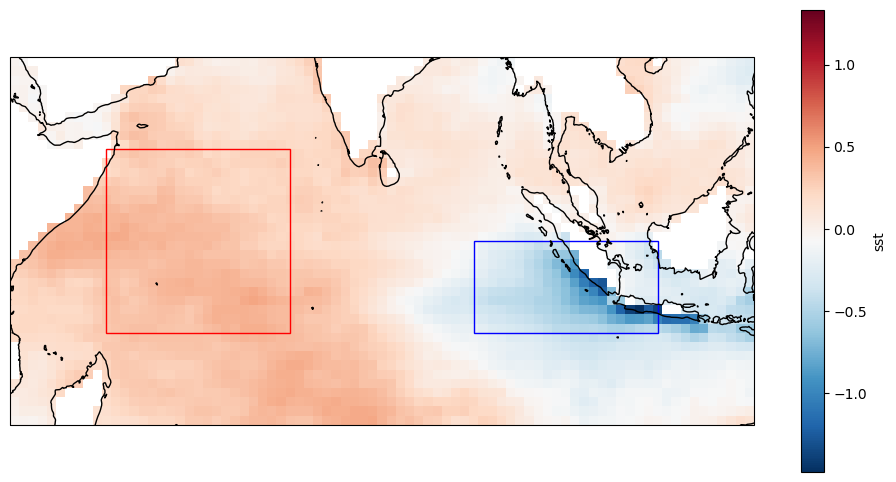

In [14]:
#positive event sst india cut
'''
wtio_sst = xr_raw_sst.sel(lat=slice(-10, 10), lon=slice(50, 70)).sst.data
setio_sst = xr_raw_sst.sel(lat=slice(-10, 0), lon=slice(90, 110)).sst.data
'''


sst_positive_event = sst_r.sel(time=positive_event_dates).mean(dim='time')
final_cut = sst_positive_event.sel(lat=slice(-20, 20), lon=slice(40, 120))



fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

final_cut.sst.plot(vmin=scommon_vmin, vmax=scommon_vmax, cmap="RdBu_r")

# Add coastlines
ax.coastlines()

# Add a title
# plt.title("198201", fontdict={'weight': 'bold', 'size': 14})

# Define the coordinates of the rectangle vertices
lon1, lon2, lat1, lat2 = 50, 70, 10, -10
vertices = [(lon1, lat1), (lon2, lat1), (lon2, lat2), (lon1, lat2)]

# Create a polygon for the specified range
polygon2 = mpatches.Polygon(vertices, closed=True, edgecolor='r', facecolor='none', transform=ccrs.PlateCarree())
ax.add_patch(polygon2)

# Define the coordinates of the rectangle vertices
lon1, lon2, lat1, lat2 = 90, 110, -10, 0
vertices = [(lon1, lat1), (lon2, lat1), (lon2, lat2), (lon1, lat2)]

# Create a polygon for the specified range
polygon = mpatches.Polygon(vertices, closed=True, edgecolor='b', facecolor='none', transform=ccrs.PlateCarree())
ax.add_patch(polygon)

# # Add text within the rectangle
# text = mtext.Text(95, 5, "Your Text Here", color='r', fontsize=12, transform=ccrs.PlateCarree())
# ax.add_artist(text)

# Save the plot
plt.savefig(image_path+'graph/positive_sst.png', bbox_inches='tight', pad_inches=0.1)

# Show the plot
plt.show()

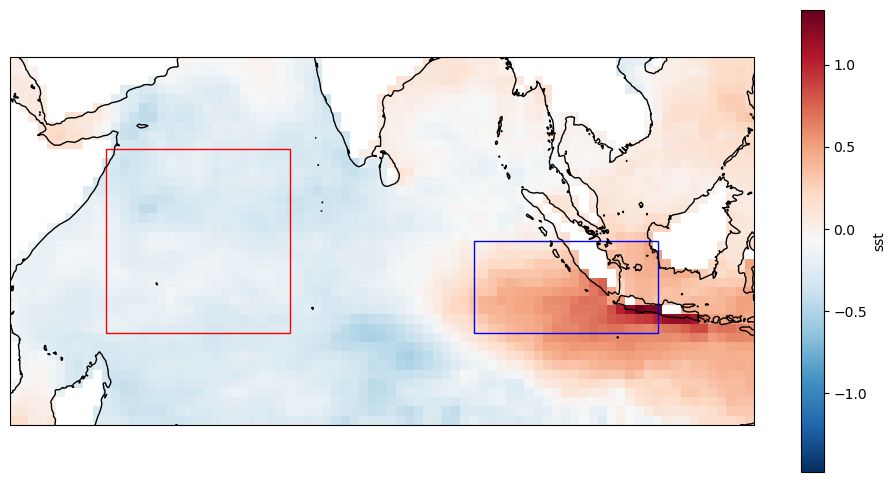

In [15]:
#negative event sst india cut
'''
wtio_sst = xr_raw_sst.sel(lat=slice(-10, 10), lon=slice(50, 70)).sst.data
setio_sst = xr_raw_sst.sel(lat=slice(-10, 0), lon=slice(90, 110)).sst.data
'''


sst_negative_event = sst_r.sel(time=negative_event_dates).mean(dim='time')
final_cut = sst_negative_event.sel(lat=slice(-20, 20), lon=slice(40, 120))



fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

final_cut.sst.plot(vmin=scommon_vmin, vmax=scommon_vmax, cmap="RdBu_r")

# Add coastlines
ax.coastlines()

# Add a title
# plt.title("198201", fontdict={'weight': 'bold', 'size': 14})

# Define the coordinates of the rectangle vertices
lon1, lon2, lat1, lat2 = 50, 70, 10, -10
vertices = [(lon1, lat1), (lon2, lat1), (lon2, lat2), (lon1, lat2)]

# Create a polygon for the specified range
polygon2 = mpatches.Polygon(vertices, closed=True, edgecolor='r', facecolor='none', transform=ccrs.PlateCarree())
ax.add_patch(polygon2)

# Define the coordinates of the rectangle vertices
lon1, lon2, lat1, lat2 = 90, 110, -10, 0
vertices = [(lon1, lat1), (lon2, lat1), (lon2, lat2), (lon1, lat2)]

# Create a polygon for the specified range
polygon = mpatches.Polygon(vertices, closed=True, edgecolor='b', facecolor='none', transform=ccrs.PlateCarree())
ax.add_patch(polygon)

# # Add text within the rectangle
# text = mtext.Text(95, 5, "Your Text Here", color='r', fontsize=12, transform=ccrs.PlateCarree())
# ax.add_artist(text)

# Save the plot
plt.savefig(image_path+'graph/negaive_sst.png', bbox_inches='tight', pad_inches=0.1)

# Show the plot
plt.show()

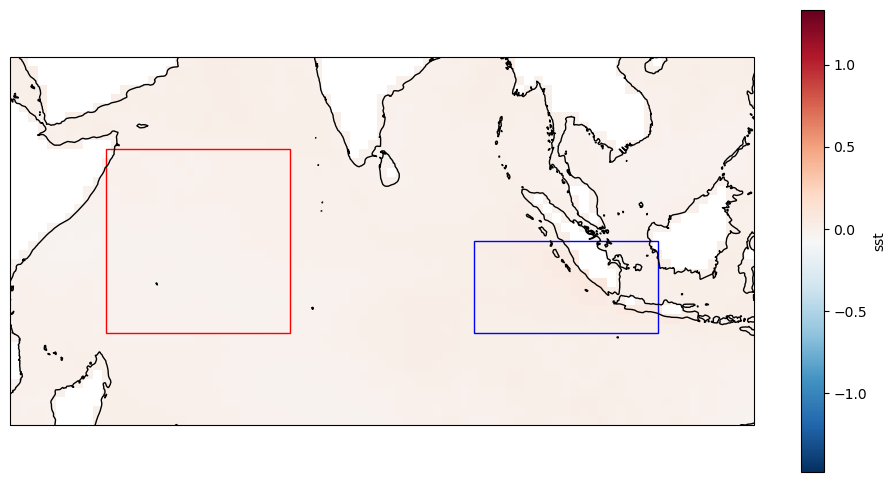

In [16]:
#netural event sst india cut
'''
wtio_sst = xr_raw_sst.sel(lat=slice(-10, 10), lon=slice(50, 70)).sst.data
setio_sst = xr_raw_sst.sel(lat=slice(-10, 0), lon=slice(90, 110)).sst.data
'''


sst_netural_event = sst_r.sel(time=non_event_dates).mean(dim='time')
final_cut = sst_netural_event.sel(lat=slice(-20, 20), lon=slice(40, 120))



fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

final_cut.sst.plot(vmin=scommon_vmin, vmax=scommon_vmax, cmap="RdBu_r")

# Add coastlines
ax.coastlines()

# Add a title
# plt.title("198201", fontdict={'weight': 'bold', 'size': 14})

# Define the coordinates of the rectangle vertices
lon1, lon2, lat1, lat2 = 50, 70, 10, -10
vertices = [(lon1, lat1), (lon2, lat1), (lon2, lat2), (lon1, lat2)]

# Create a polygon for the specified range
polygon2 = mpatches.Polygon(vertices, closed=True, edgecolor='r', facecolor='none', transform=ccrs.PlateCarree())
ax.add_patch(polygon2)

# Define the coordinates of the rectangle vertices
lon1, lon2, lat1, lat2 = 90, 110, -10, 0
vertices = [(lon1, lat1), (lon2, lat1), (lon2, lat2), (lon1, lat2)]

# Create a polygon for the specified range
polygon = mpatches.Polygon(vertices, closed=True, edgecolor='b', facecolor='none', transform=ccrs.PlateCarree())
ax.add_patch(polygon)

# # Add text within the rectangle
# text = mtext.Text(95, 5, "Your Text Here", color='r', fontsize=12, transform=ccrs.PlateCarree())
# ax.add_artist(text)

# Save the plot
plt.savefig(image_path+'graph/netural_sst.png', bbox_inches='tight', pad_inches=0.1)

# Show the plot
plt.show()

In [17]:

# Normalize 객체 생성
# normalize = Normalize(vmin=min(df1['precip'].min(), df2['precip'].min(), df3['precip'].min()),
                    #   vmax=max(df1['precip'].max(), df2['precip'].max(), df3['precip'].max()))

# qq1 = m1.pcolor(lon1, lat1, df1_pivot, cmap=cmap, norm=normalize)


# colorbar 통일

# positive_cut = sst_positive_event.sel(lat=slice(-20, 20), lon=slice(40, 120))
precip_positive_event = precip_r.sel(time=positive_event_dates).mean(dim='time')


precip_np=precip_positive_event.precip.data
pcommon_vmin = np.nanmin(precip_np) 
pcommon_vmax = np.nanmax(precip_np) 





d:\anaconda3\envs\final_sealab\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


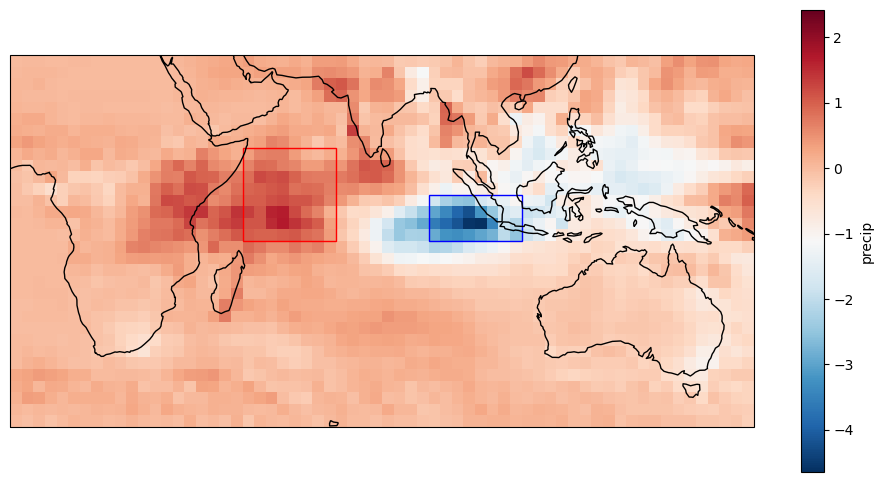

In [18]:
#positive event precip india cut
'''
wtio_sst = xr_raw_sst.sel(lat=slice(-10, 10), lon=slice(50, 70)).sst.data
setio_sst = xr_raw_sst.sel(lat=slice(-10, 0), lon=slice(90, 110)).sst.data
'''


precip_positive_event = precip_r.sel(time=positive_event_dates).mean(dim='time')
# final_cut = precip_positive_event.sel(lat=slice(-20, 20), lon=slice(40, 120))
final_cut = precip_positive_event.sel(lat=slice(-50, 30), lon=slice(0, 160))


fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

final_cut.precip.plot(vmin=pcommon_vmin, vmax=pcommon_vmax, cmap='RdBu_r')



# Add coastlines
ax.coastlines()

# Add a title
# plt.title("198201", fontdict={'weight': 'bold', 'size': 14})

# Define the coordinates of the rectangle vertices
lon1, lon2, lat1, lat2 = 50, 70, 10, -10
vertices = [(lon1, lat1), (lon2, lat1), (lon2, lat2), (lon1, lat2)]

# Create a polygon for the specified range
polygon2 = mpatches.Polygon(vertices, closed=True, edgecolor='r', facecolor='none', transform=ccrs.PlateCarree())
ax.add_patch(polygon2)

# Define the coordinates of the rectangle vertices
lon1, lon2, lat1, lat2 = 90, 110, -10, 0
vertices = [(lon1, lat1), (lon2, lat1), (lon2, lat2), (lon1, lat2)]

# Create a polygon for the specified range
polygon = mpatches.Polygon(vertices, closed=True, edgecolor='b', facecolor='none', transform=ccrs.PlateCarree())
ax.add_patch(polygon)

# # Add text within the rectangle
# text = mtext.Text(95, 5, "Your Text Here", color='r', fontsize=12, transform=ccrs.PlateCarree())
# ax.add_artist(text)

# Save the plot
plt.savefig(image_path+'graph/positive_precip.png', bbox_inches='tight', pad_inches=0.1)

# Show the plot
plt.show()

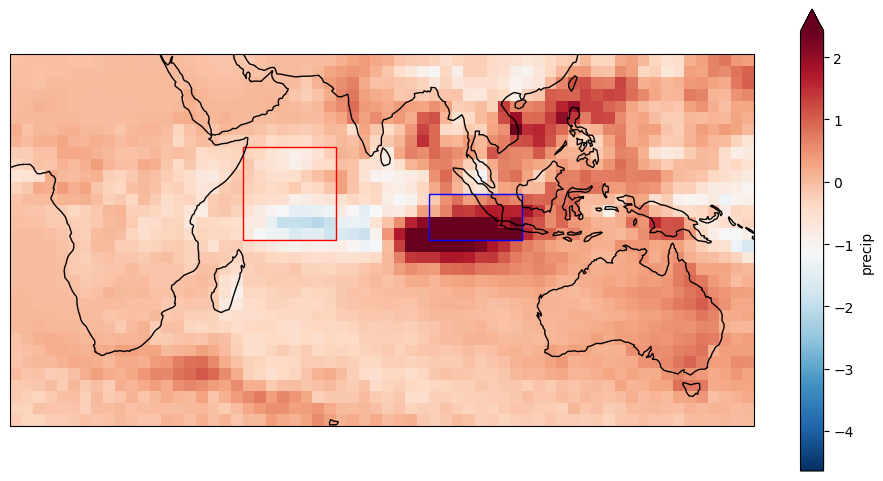

In [19]:
#negative event precip india cut
'''
wtio_sst = xr_raw_sst.sel(lat=slice(-10, 10), lon=slice(50, 70)).sst.data
setio_sst = xr_raw_sst.sel(lat=slice(-10, 0), lon=slice(90, 110)).sst.data
'''


precip_negative_event = precip_r.sel(time=negative_event_dates).mean(dim='time')
# final_cut = precip_positive_event.sel(lat=slice(-20, 20), lon=slice(40, 120))
final_cut = precip_negative_event.sel(lat=slice(-50, 30), lon=slice(0, 160))


fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

final_cut.precip.plot(vmin=pcommon_vmin, vmax=pcommon_vmax, cmap='RdBu_r')

# Add coastlines
ax.coastlines()

# Add a title
# plt.title("198201", fontdict={'weight': 'bold', 'size': 14})

# Define the coordinates of the rectangle vertices
lon1, lon2, lat1, lat2 = 50, 70, 10, -10
vertices = [(lon1, lat1), (lon2, lat1), (lon2, lat2), (lon1, lat2)]

# Create a polygon for the specified range
polygon2 = mpatches.Polygon(vertices, closed=True, edgecolor='r', facecolor='none', transform=ccrs.PlateCarree())
ax.add_patch(polygon2)

# Define the coordinates of the rectangle vertices
lon1, lon2, lat1, lat2 = 90, 110, -10, 0
vertices = [(lon1, lat1), (lon2, lat1), (lon2, lat2), (lon1, lat2)]

# Create a polygon for the specified range
polygon = mpatches.Polygon(vertices, closed=True, edgecolor='b', facecolor='none', transform=ccrs.PlateCarree())
ax.add_patch(polygon)

# # Add text within the rectangle
# text = mtext.Text(95, 5, "Your Text Here", color='r', fontsize=12, transform=ccrs.PlateCarree())
# ax.add_artist(text)

# Save the plot
plt.savefig(image_path+'graph/negative_precip.png', bbox_inches='tight', pad_inches=0.1)

# Show the plot
plt.show()

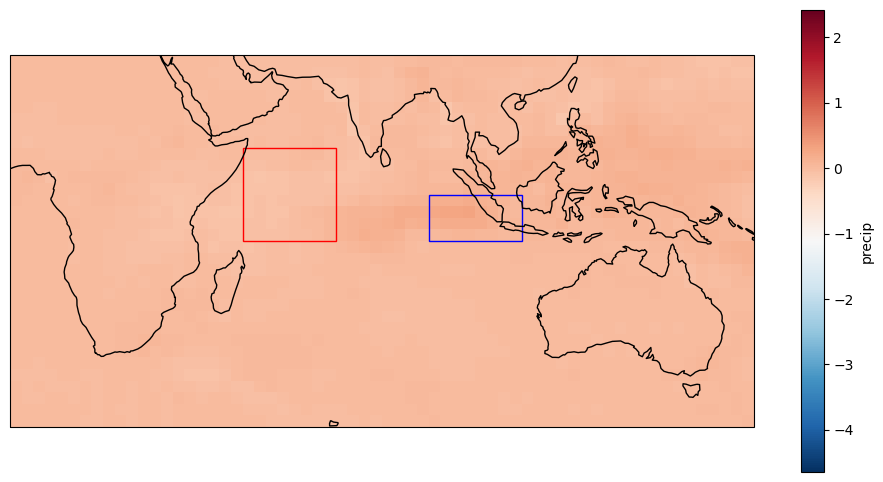

In [20]:
#netural event precip india cut
'''
wtio_sst = xr_raw_sst.sel(lat=slice(-10, 10), lon=slice(50, 70)).sst.data
setio_sst = xr_raw_sst.sel(lat=slice(-10, 0), lon=slice(90, 110)).sst.data
'''


precip_netural_event = precip_r.sel(time=non_event_dates).mean(dim='time')
# final_cut = precip_positive_event.sel(lat=slice(-20, 20), lon=slice(40, 120))
final_cut = precip_netural_event.sel(lat=slice(-50, 30), lon=slice(0, 160))


fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

final_cut.precip.plot(vmin=pcommon_vmin, vmax=pcommon_vmax, cmap='RdBu_r')

# Add coastlines
ax.coastlines()

# Add a title
# plt.title("198201", fontdict={'weight': 'bold', 'size': 14})

# Define the coordinates of the rectangle vertices
lon1, lon2, lat1, lat2 = 50, 70, 10, -10
vertices = [(lon1, lat1), (lon2, lat1), (lon2, lat2), (lon1, lat2)]

# Create a polygon for the specified range
polygon2 = mpatches.Polygon(vertices, closed=True, edgecolor='r', facecolor='none', transform=ccrs.PlateCarree())
ax.add_patch(polygon2)

# Define the coordinates of the rectangle vertices
lon1, lon2, lat1, lat2 = 90, 110, -10, 0
vertices = [(lon1, lat1), (lon2, lat1), (lon2, lat2), (lon1, lat2)]

# Create a polygon for the specified range
polygon = mpatches.Polygon(vertices, closed=True, edgecolor='b', facecolor='none', transform=ccrs.PlateCarree())
ax.add_patch(polygon)

# # Add text within the rectangle
# text = mtext.Text(95, 5, "Your Text Here", color='r', fontsize=12, transform=ccrs.PlateCarree())
# ax.add_artist(text)

# Save the plot
plt.savefig(image_path+'graph/netural_precip.png', bbox_inches='tight', pad_inches=0.1)


# Show the plot
plt.show()